In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
pd.options.mode.chained_assignment = None  # default='warn'

Exploratory Data Analysis

Under this section, after importing the requiste libraries, I will visualize and describe the data set statistically to understand the relationship of the features with the target. 

In [2]:
data = pd.read_csv("adult.csv", header=0)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
new_data = data.dropna(axis=0)
print("Old data frame length:", len(data))
print("New data frame length:", len(new_data)) 
print("Number of rows with at least 1 NA value: ", (len(data)-len(new_data)))

Old data frame length: 48842
New data frame length: 48842
Number of rows with at least 1 NA value:  0


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
new_data.income.value_counts() #Represents the instances belonging to each class

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
new_data.describe().T #Statistical description of the continuous features

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
new_data.describe(include="object").T #Statistical description of the categorical features

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


Continuous Features - Graphical Representation

Using box plots to depict the relationship of each continuous feature with the categorical target variable.

Text(0.5, 1.0, 'Income Counts')

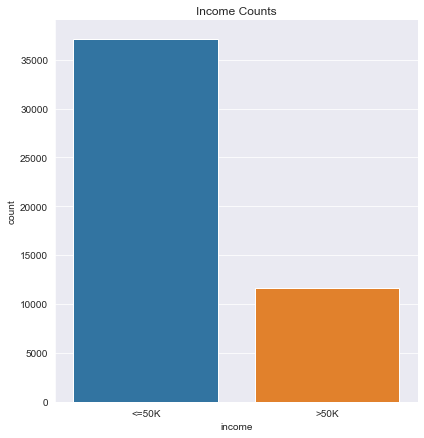

In [8]:
sns.catplot(data=new_data, x="income", kind="count", palette= 'tab10', height=6, aspect=1)
plt.title("Income Counts")

Text(0.5, 1.0, 'Age vs Income')

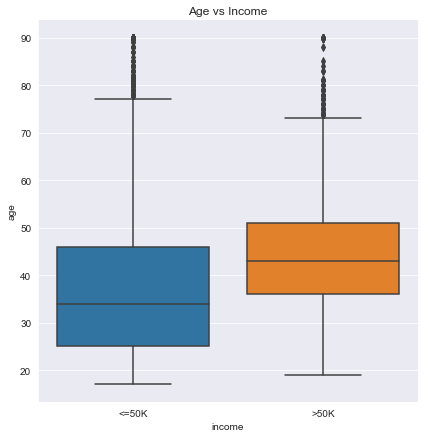

In [9]:
sns.catplot(data=new_data, x="income", y="age", kind="box", palette= 'tab10',height=6, aspect=1)
plt.title("Age vs Income")

Text(0.5, 1.0, 'fnlwgt vs Income')

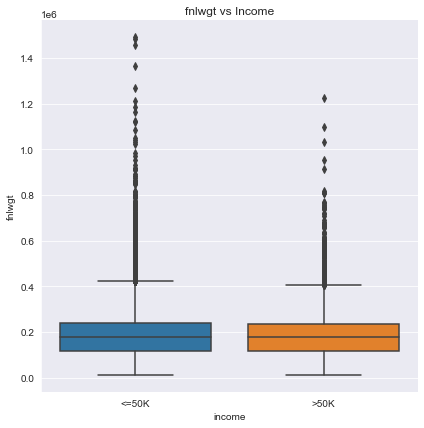

In [10]:
sns.catplot(data=new_data, x="income", y="fnlwgt", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title("fnlwgt vs Income")

Text(0.5, 1.0, 'Education-num vs Income')

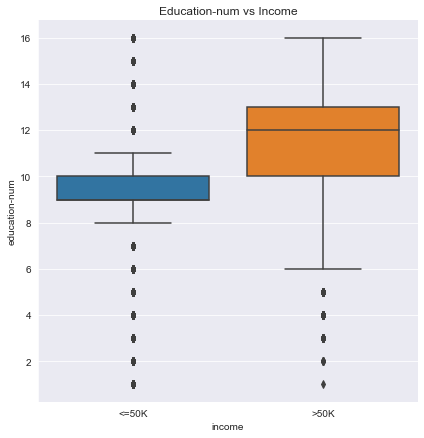

In [11]:
sns.catplot(data=new_data, x="income", y="education-num", kind="box", palette= 'tab10',height=6, aspect=1)
plt.title("Education-num vs Income")

Text(0.5, 1.0, 'Capital-gain vs Income')

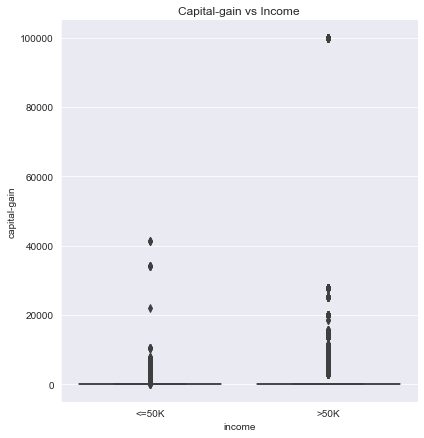

In [12]:
sns.catplot(data=new_data, x="income", y="capital-gain", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title("Capital-gain vs Income")

Text(0.5, 1.0, 'Capital-loss vs Income')

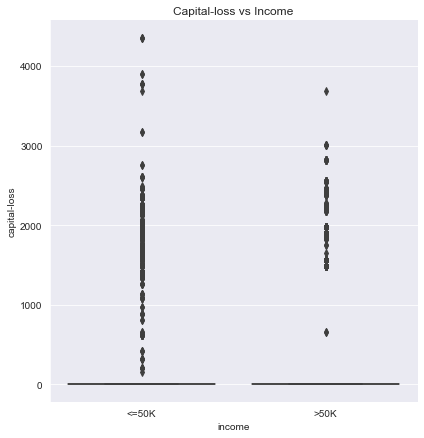

In [13]:
sns.catplot(data=new_data, x="income", y="capital-loss", kind="box", palette= 'tab10', height=6, aspect=1)
plt.title("Capital-loss vs Income")

Text(0.5, 1.0, 'Hours-per-week vs Income')

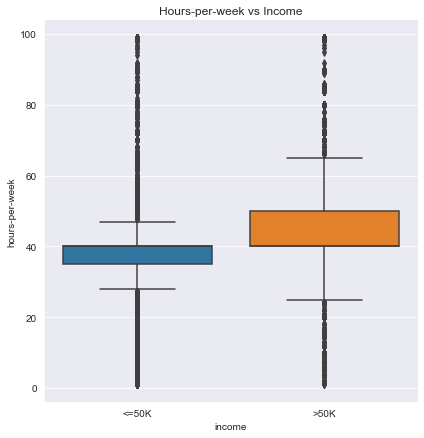

In [14]:
sns.catplot(data=new_data, x="income", y="hours-per-week", kind="box", palette= 'tab10',  height=6, aspect=1)
plt.title("Hours-per-week vs Income")

Categorical Features - Graphical Representation

Using bar/count plots to depict the relationship of each categorical feature with the target variable.

Text(0.5, 1.0, 'Workclass vs Income')

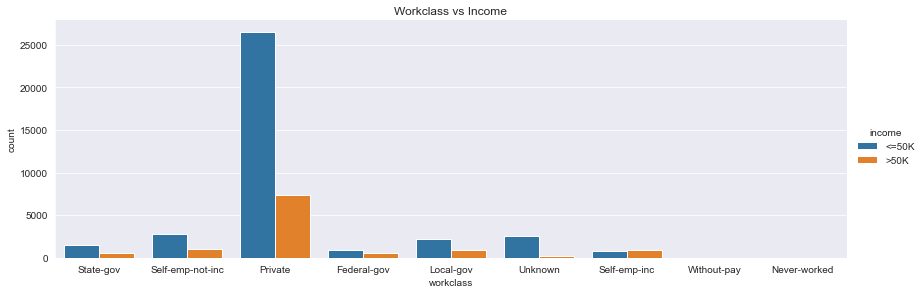

In [15]:
sns.catplot(x='workclass', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title("Workclass vs Income")

Text(0.5, 1.0, 'Education vs Income')

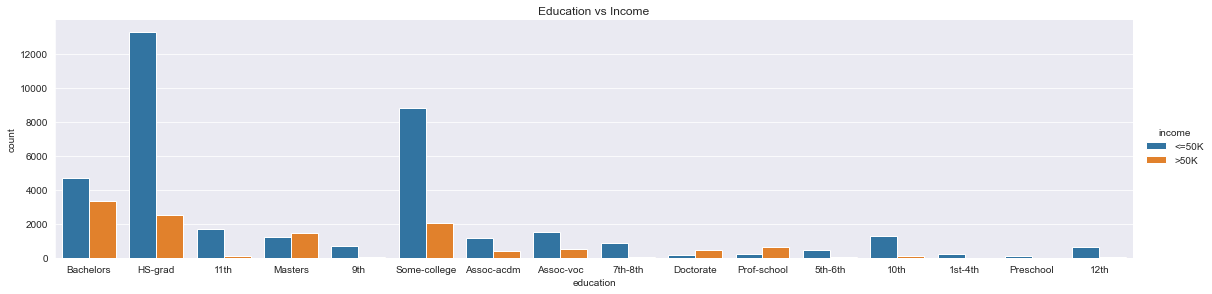

In [16]:
sns.catplot(x='education', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=4)
plt.title("Education vs Income")

Text(0.5, 1.0, 'Marital-status vs Income')

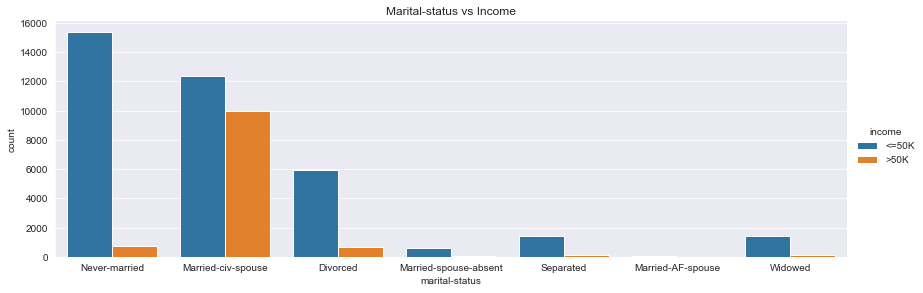

In [17]:
sns.catplot(x='marital-status', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title("Marital-status vs Income")

Text(0.5, 1.0, 'Occupation vs Income')

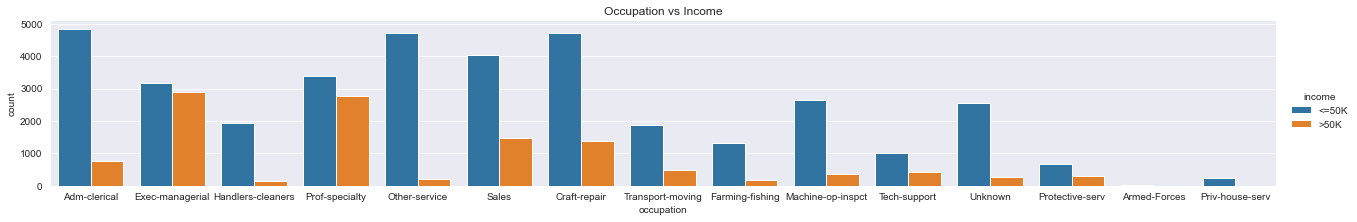

In [18]:
sns.catplot(x='occupation', data=new_data, kind='count', hue="income", palette= 'tab10',  height=3, aspect=6)
plt.title("Occupation vs Income")

Text(0.5, 1.0, 'Relationship vs Income')

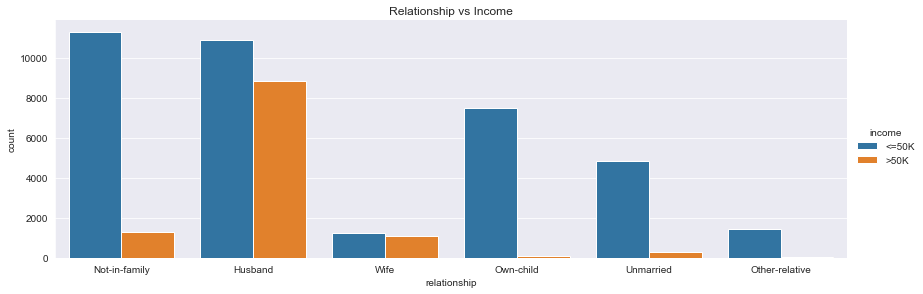

In [19]:
sns.catplot(x='relationship', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title("Relationship vs Income")

Text(0.5, 1.0, 'Race vs Income')

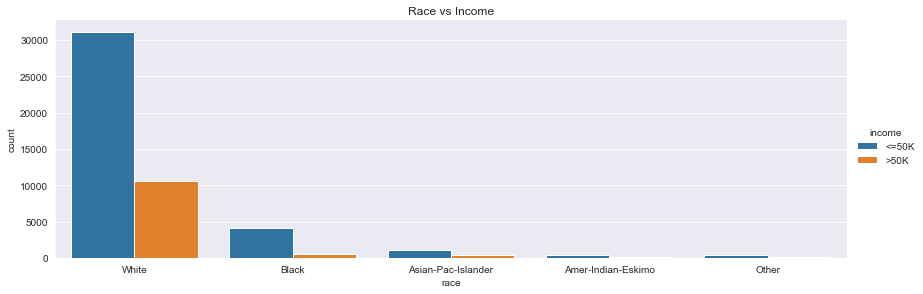

In [20]:
sns.catplot(x='race', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title("Race vs Income")

Text(0.5, 1.0, 'Sex vs Income')

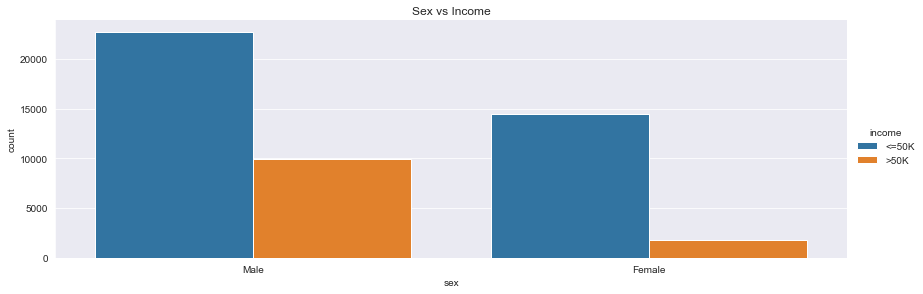

In [21]:
sns.catplot(x='sex', data=new_data, kind='count', hue="income", palette= 'tab10',  height=4, aspect=3)
plt.title("Sex vs Income")

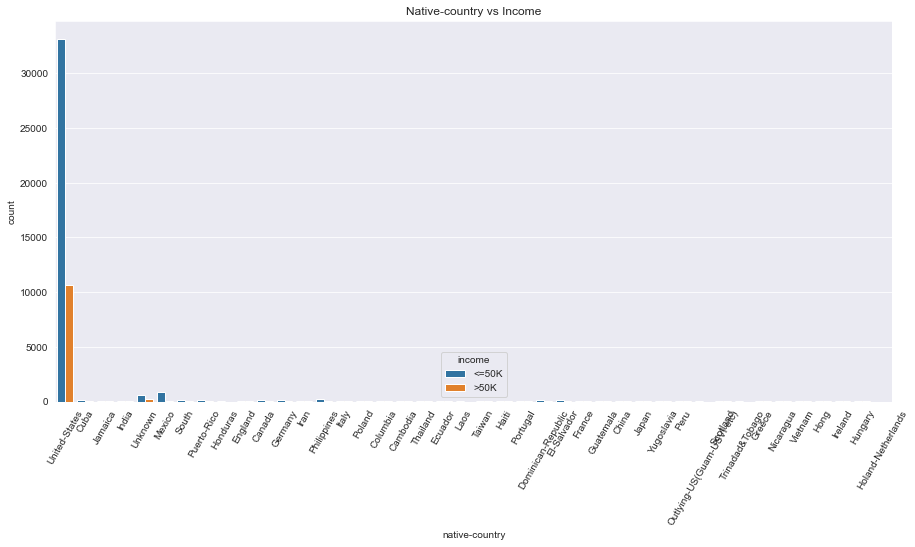

In [22]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='native-country', data=new_data, hue="income", palette= 'tab10')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title("Native-country vs Income")
plt.show()

Data Preprocessing

Under this section, I have attempted to organize the data set by splitting into the feature matrix and the target series. The application of imputation for missing data, label encoding the target variable, standardization for scaling of the (numerical) feature space, one-hot encoding for the numerical represenation of categorical features. Furthermore, the data set is then split into the training and testing sets, 90% and 10% respectively.

In [23]:
label_income = LabelEncoder()
new_data['income'] = label_income.fit_transform(new_data['income'])
new_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [24]:
x = new_data.drop(['income'], axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [25]:
y = new_data['income']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
48842 non-null  int32
dtypes: int32(1)
memory usage: 190.9 KB


In [26]:
numeric_features = ['fnlwgt', 'capital-gain', 'capital-loss', 'age', 'education-num', 'hours-per-week']
categorical_features = list(x.select_dtypes(include='object').columns)

In [27]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

categorical_transformer= make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(drop="if_binary", handle_unknown="ignore")
)

In [28]:
col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    remainder='passthrough', sparse_threshold=0
)

In [29]:
col_transformer.fit(x)

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['fnlwgt', 'capital-gain', 'capital-loss',
                                  'age', 'education-num', 'hours-per-week']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
         

In [30]:
onehot_cols = (
    col_transformer
    .named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)

In [31]:
columns = numeric_features + onehot_cols.tolist()

In [32]:
X = col_transformer.transform(x)
pd.DataFrame(X, columns = columns)

,fnlwgt,capital-gain,capital-loss,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,-1.061979,0.146932,-0.217127,0.025996,1.136512,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.007104,-0.144804,-0.217127,0.828308,1.136512,-2.213032,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246034,-0.144804,-0.217127,-0.046942,-0.419335,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.426663,-0.144804,-0.217127,1.047121,-1.197259,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.408530,-0.144804,-0.217127,-0.776316,1.136512,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.243884,-0.144804,-0.217127,0.025996,1.136512,-0.356894,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,1.247492,-0.144804,-0.217127,1.849433,-0.419335,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,1.754865,-0.144804,-0.217127,-0.046942,1.136512,0.772930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,-1.001612,0.587220,-0.217127,0.390683,1.136512,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.1)

Model Building

Under this section, I have fed the tarining data set to the Random Forest classifier to train and validate using 10-fold cross validation. This allows the classifier to improve accuracy and specify the optimal values for the hyperparamters. In addition, I am also able to reduce overfitting thus ensuring the model is able to generalize well on the unseen test data.

In [34]:
results_dict = {"max_depth":list(), "mean_train_score":list(), "mean_cv_score":list(), "std_cv_score":list()}
for k in range(1,50):
        model = RandomForestClassifier(n_estimators= 100, criterion="entropy", max_depth = k, max_features = "sqrt")
        scores = pd.DataFrame(cross_validate(model, X_train, y_train, cv=10, return_train_score=True))
        results_dict["max_depth"].append(k)
        results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
        results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
        results_dict["std_cv_score"].append(np.std(scores["test_score"]))
results_df = pd.DataFrame(results_dict)
results_df

,max_depth,mean_train_score,mean_cv_score,std_cv_score
0,1,0.760789,0.760789,0.000099
1,2,0.772553,0.772209,0.005218
2,3,0.791690,0.791319,0.004347
3,4,0.821017,0.819892,0.004844
4,5,0.837263,0.837068,0.004094
5,6,0.845397,0.844257,0.002830
6,7,0.851051,0.849353,0.003013
7,8,0.854244,0.851514,0.002675
8,9,0.858824,0.854835,0.003437
9,10,0.862105,0.857429,0.003492


In [35]:
results_df.sort_values("mean_cv_score", ascending=False)

,max_depth,mean_train_score,mean_cv_score,std_cv_score
23,24,0.928190,0.864322,0.003752
22,23,0.922381,0.863981,0.003834
20,21,0.909748,0.863822,0.003526
24,25,0.934663,0.863662,0.003999
18,19,0.898188,0.863640,0.004015
16,17,0.887676,0.863298,0.003993
21,22,0.916001,0.863230,0.003353
25,26,0.940707,0.863185,0.004188
19,20,0.903823,0.863162,0.003156
26,27,0.946541,0.862821,0.003194


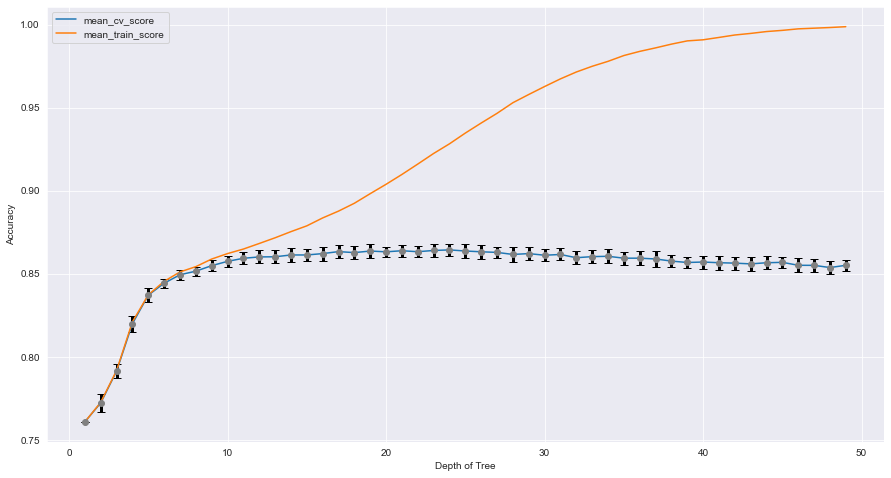

In [36]:
plt.figure(figsize=[15,8])
plt.errorbar(results_df["max_depth"], results_df["mean_cv_score"], yerr=results_df["std_cv_score"], fmt='o', 
             color="grey", ecolor='black',  elinewidth=3, capsize=4)
plt.plot(results_df["max_depth"], results_df["mean_cv_score"], label = "mean_cv_score")
plt.plot(results_df["max_depth"], results_df["mean_train_score"], label = "mean_train_score")
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model Evaluation

Under this section, I feed the unseen test data (10%) of the total data set to the trained Random Forest classifer to predict the output. We analyze results obatined using metrics such as accuracy, confusion matrix, and ROC curve.

In [45]:
model = RandomForestClassifier(n_estimators= 100, criterion="entropy", max_depth = 15, max_features = "sqrt")
model.fit(X_train, y_train);
predictions = model.predict(X_test)
print("Test accuracy:", round(model.score(X_test, y_test), 4))

Test accuracy: 0.8628


In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      3713
           1       0.80      0.57      0.67      1172

    accuracy                           0.86      4885
   macro avg       0.84      0.76      0.79      4885
weighted avg       0.86      0.86      0.85      4885



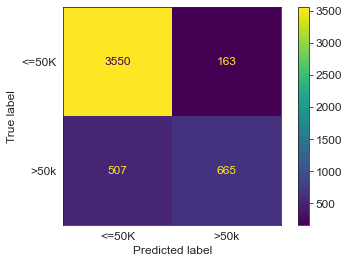

In [46]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50k"])
sns.set_style("white")
plt.rc('font', size=12)
disp.plot()
plt.show()

Random Forest: ROC AUC=0.921


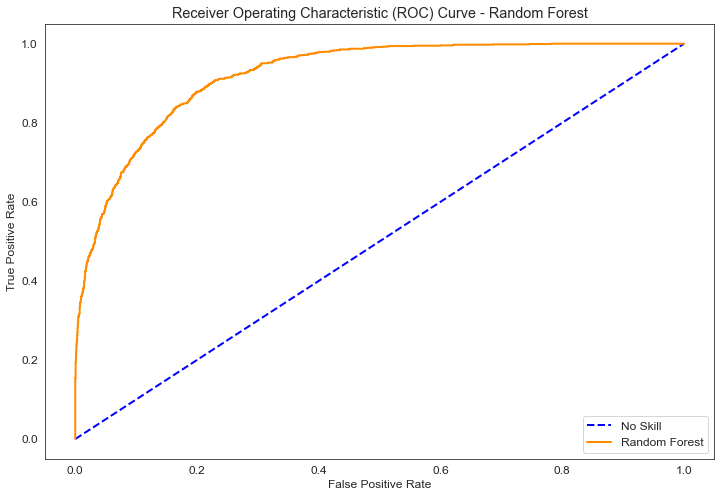

In [47]:
ns_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)
model_probs = model_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test,model_probs)
print('Random Forest: ROC AUC=%.3f' % (model_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr,_ = roc_curve(y_test, model_probs)
plt.figure(figsize=[12,8])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', linewidth=2, color="blue")
plt.plot(model_fpr, model_tpr, label='Random Forest', linewidth=2, color="darkorange")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (ROC) Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

End of file